In [60]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
%matplotlib inline
import seaborn as sns
import rasterio
import rasterio.plot
from rasterio.plot import show
import fiona
import rasterio.mask
from matplotlib import rcParams
import matplotlib.pyplot as plt
from pyproj import Transformer
import numpy as np

import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [61]:
import rioxarray

# Load image and visualize
raster = rioxarray.open_rasterio('S2B_20220412_RGB_cut_CAIONE.tif', crs="EPSG:4326")
#raster.plot.imshow(figsize=(8,8))

In [62]:
raster

<xarray.DataArray (band: 3, y: 111, x: 114)>
array([[[28, 28, ..., 86, 75],
        [30, 30, ..., 65, 64],
        ...,
        [28, 29, ..., 24, 23],
        [35, 35, ..., 23, 21]],

       [[29, 26, ..., 84, 72],
        [28, 27, ..., 59, 56],
        ...,
        [32, 34, ..., 24, 23],
        [36, 37, ..., 23, 22]],

       [[29, 30, ..., 83, 68],
        [28, 29, ..., 58, 58],
        ...,
        [27, 30, ..., 24, 25],
        [35, 34, ..., 22, 21]]], dtype=uint8)
Coordinates:
  * band         (band) int64 1 2 3
  * x            (x) float64 5.418e+05 5.418e+05 ... 5.429e+05 5.429e+05
  * y            (y) float64 4.594e+06 4.594e+06 ... 4.593e+06 4.593e+06
    spatial_ref  int64 0
Attributes:
    scale_factor:  1.0
    add_offset:    0.0

In [63]:
xds_lonlat = raster.rio.reproject("EPSG:4326")


In [64]:
xds_lonlat

<xarray.DataArray (band: 3, y: 95, x: 129)>
array([[[255,  28,  28, ..., 255, 255, 255],
        [255,  30,  30, ...,  76,  65,  64],
        [255,  34,  35, ...,  64,  62,  62],
        ...,
        [ 28,  29,  34, ...,  26,  26,  26],
        [ 35,  35,  36, ...,  24,  23,  23],
        [255, 255, 255, ...,  23,  21,  21]],

       [[255,  29,  26, ..., 255, 255, 255],
        [255,  28,  27, ...,  70,  59,  56],
        [255,  31,  33, ...,  55,  54,  53],
        ...,
        [ 32,  34,  36, ...,  27,  26,  26],
        [ 36,  37,  39, ...,  24,  23,  23],
        [255, 255, 255, ...,  23,  22,  22]],

       [[255,  29,  30, ..., 255, 255, 255],
        [255,  28,  29, ...,  73,  58,  58],
        [255,  32,  37, ...,  58,  55,  56],
        ...,
        [ 27,  30,  33, ...,  28,  28,  28],
        [ 35,  34,  36, ...,  24,  25,  25],
        [255, 255, 255, ...,  22,  21,  21]]], dtype=uint8)
Coordinates:
  * x            (x) float64 15.5 15.5 15.5 15.5 ... 15.51 15.51 15.51 15.51
  * y            (y) float64 41.5 41.5 41.5 41.5 ... 41.49 41.49 41.49 41.49
  * band         (band) int64 1 2 3
    spatial_ref  int64 0
Attributes:
    scale_factor:  1.0
    add_offset:    0.0
    _FillValue:    255

In [65]:
print(raster.rio.crs)

EPSG:32633


In [70]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

fig.set_size_inches((16,6))


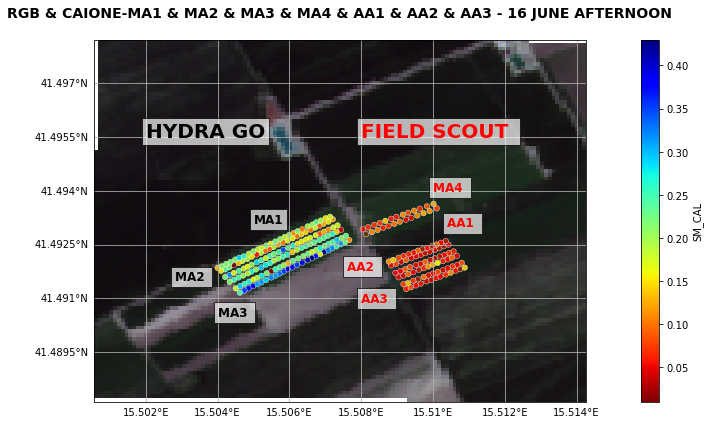

In [154]:

import seaborn as sns
import warnings
import matplotlib.colors

warnings.filterwarnings('ignore')

df1 = pd.read_csv('ca_16_june_afternoon.csv')


cmap2 = matplotlib.colors.LinearSegmentedColormap.from_list("", ["#653700","red","yellow"]) 


fig = plt.figure(figsize=(16, 6))


#greyscale = raster.mean(dim="band")

# Plot on a map
ax = plt.axes(projection=ccrs.PlateCarree())
g1 = ax.gridlines(draw_labels = True,linestyle='None')

xds_lonlat.plot.imshow(ax=ax)

g1.xlabels_top = False
g1.ylabels_right = False

ax1=sns.scatterplot(data=df1.SM_CAL_ALL, x=df1.LONGITUDE, y=df1.LATITUDE, hue= df1.SM_CAL_ALL,alpha=0.9,palette=cmap2,sizes=(10, 10),s=30)
sm1 = plt.cm.ScalarMappable(cmap=plt.cm.jet.reversed())
sm1.set_array([(0.23, 0.43, 0.01)])
ax1.get_legend().remove()


ax2=sns.scatterplot(data=df1.SM_CAL, x=df1.LONGITUDE, y=df1.LATITUDE, hue= df1.SM_CAL,alpha=0.9,palette=plt.cm.jet.reversed(),sizes=(10, 10),s=30)
sm2 = plt.cm.ScalarMappable(cmap=plt.cm.jet.reversed())
sm2.set_array([(0.23, 0.43, 0.01)])

ax2.get_legend().remove()


cbar_ticks=np.arange(0.23, 0.43, 0.01)
cbar = plt.colorbar(sm1, orientation="vertical", fraction=0.05)#, pad=0.07, ticks=cbar_ticks)
cbar.set_label('SM_CAL', fontsize=10)


plt.text(15.505,41.4931,'MA1',fontsize=12,fontweight='bold',bbox = dict(facecolor = 'white', alpha = 0.7))

plt.text(15.5028,41.4915,'MA2 ',fontsize=12,fontweight='bold',bbox = dict(facecolor = 'white', alpha = 0.7))
plt.text(15.51,41.494,'MA4 ',fontsize=12,color='r',fontweight='bold',bbox = dict(facecolor = 'white', alpha = 0.7))

plt.text(15.504,41.4905,'MA3 ',fontsize=12,fontweight='bold',bbox = dict(facecolor = 'white', alpha = 0.7))

plt.text(15.5104,41.493,'AA1 ',fontsize=12,color='r',fontweight='bold',bbox = dict(facecolor = 'white', alpha = 0.7))
plt.text(15.5076,41.4918,'AA2 ',fontsize=12,color='r',fontweight='bold',bbox = dict(facecolor = 'white', alpha = 0.7))
plt.text(15.508,41.4909,'AA3 ',fontsize=12,color='r',fontweight='bold',bbox = dict(facecolor = 'white', alpha = 0.7))


plt.text(15.508,41.4955,'FIELD SCOUT ',color='r',fontweight='bold',fontsize=20,bbox = dict(facecolor = 'white', alpha = 0.7))
plt.text(15.502,41.4955,'HYDRA GO',fontweight='bold',fontsize=20,bbox = dict(facecolor = 'white', alpha = 0.7))


plt.title('RGB & CAIONE-MA1 & MA2 & MA3 & MA4 & AA1 & AA2 & AA3 - 16 JUNE AFTERNOON\n',fontweight='bold', size=14)

plt.tight_layout()